In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os, sys
import seaborn as sns
import warnings
import json

from sklearn import metrics as skmetrics

from dl_portfolio.hedge import load_activation

from hedge_performance import (
    DATA_BASE_DIR_1, 
    PERF_DIR_1, 
    GARCH_BASE_DIR_1, 
    DATA_BASE_DIR_2, 
    PERF_DIR_2,
    GARCH_BASE_DIR_2,
)

SAVE=True
AE_DIR1 = "final_models/ae/dataset1/m_0_seed_6_1682872204041201"
AE_DIR2 = "final_models/ae/dataset2/m_0_seed_1_168287486565735"

savedir = "paper_result_update/ae"
if SAVE:
    if not os.path.isdir(savedir):
        os.makedirs(savedir)   

# Dataset 1

In [8]:
(
    train_activation, 
    test_activation, 
    train_probas, 
    test_probas, 
    predictions,
    models,
    _,
) = load_activation(
    DATA_BASE_DIR_1, AE_DIR1, GARCH_BASE_DIR_1, PERF_DIR_1, "dataset1")
test_target = (test_activation <= 0).astype(int)

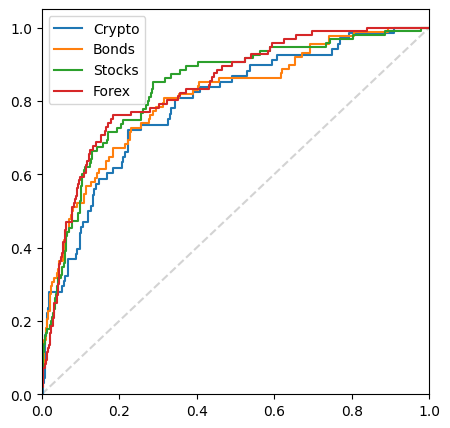

{'Crypto': 0.7920951156812339, 'Bonds': 0.8079205137310606, 'Stocks': 0.8348215207738114, 'Forex': 0.8356511780104712}


In [9]:
save=False
plt.figure(figsize=(5,5))
plt.plot([0, 1], [0, 1], color="lightgrey", linestyle="--")
roc_auc = {}
for c in predictions:
    temp = test_probas[c].dropna()
    fpr, tpr, t = skmetrics.roc_curve(test_target.loc[temp.index, c], temp)
    roc_auc[c] = skmetrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, label=c)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
if save:
    plt.savefig(f"{savedir}/roc_curve_d1.png", transparent=True, bbox_inches="tight")
else:
    plt.legend()
plt.show()
print(roc_auc)

# Dataset 2

In [10]:
(
    train_activation, 
    test_activation, 
    train_probas, 
    test_probas, 
    predictions,
    models,
    _,
) = load_activation(
    DATA_BASE_DIR_2, AE_DIR2, GARCH_BASE_DIR_2, PERF_DIR_2, "dataset2")
test_target = (test_activation <= 0).astype(int)

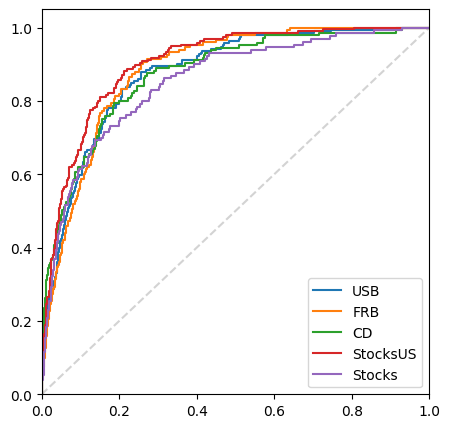

{'USB': 0.8762287377889676, 'FRB': 0.8840285296897825, 'CD': 0.8740868421754081, 'StocksUS': 0.9032994577918732, 'Stocks': 0.8535760573831314}


In [11]:
save=False
plt.figure(figsize=(5,5))
plt.plot([0, 1], [0, 1], color="lightgrey", linestyle="--")
roc_auc = {}
for c in predictions:
    temp = test_probas[c].dropna()
    fpr, tpr, t = skmetrics.roc_curve(test_target.loc[temp.index, c], temp)
    roc_auc[c] = skmetrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, label=c)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
if save:
    plt.savefig(f"{savedir}/roc_curve_d2.png", transparent=True, bbox_inches="tight")
else:
    plt.legend()
plt.show()
print(roc_auc)